# Overview
Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis.This historical data covers sales from 2010-01-10 to 2012-12-10.

## Business Goal
Our goal is to analyze the data to find ways for each store to improve and predict their sales for the next 12 weeks.

#### The steps are broadly divided into:
1. [ Reading and Understanding the Data](#1)
1. [ EDA](#2)
1. [ Data Cleansing](#3)
1. [ Data splitting](#4)
1. [ Model Building](#5)
     1. [Random forest regressor](#6)
     1. [ARIMAX](#7)
     1. [SARIMAX](#8)
     1. [Fb prophet](#9)
1. [ Final Analysis](#10)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

<a id="1"></a> <br>
## 1] Reading and Understanding the Data

In [2]:
df = pd.read_csv(r"C:\Users\zerin\Downloads\Walmart (1) (1).csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
original_df = df.copy(deep=True)
sorted_dates = original_df['Date'].sort_values()

starting_date = sorted_dates.head(1)
ending_date = sorted_dates.tail(1)

print("Starting date:", starting_date)
print("Ending date:", ending_date)

Starting date: 606   2010-01-10
Name: Date, dtype: datetime64[ns]
Ending date: 283   2012-12-10
Name: Date, dtype: datetime64[ns]


#### Our data is from 10th of January 2010 to 10th of December 2012.

In [5]:
original_df = df.set_index('Date')
original_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df['Store'].nunique()

45

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# for EDA purposes

df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.week
df['month'] = df.Date.dt.month_name()
df['year'] = df.Date.dt.year

In [10]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

In [12]:
df.nunique().sort_values()

Holiday_Flag       2
year               3
month             12
Store             45
weekday           52
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [7]:
target = 'Weekly_Sales'
features = [i for i in df.columns if i != target]

features_df = df[features].copy()
features_df.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,17,May,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,48,December,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,7,February,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,8,February,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,18,May,2010


In [8]:
nu = df[features].nunique().sort_values()
nf = []; 
cf = []; 
 #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:
        cf.append(nu.index[i])
    else: 
        nf.append(nu.index[i])

print('Inference: The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

Inference: The Datset has 6 numerical & 4 categorical features.


In [9]:
print('cf :', cf)
print('nf :', nf)

cf : ['Holiday_Flag', 'year', 'month', 'Store']
nf : ['weekday', 'Date', 'Unemployment', 'Fuel_Price', 'CPI', 'Temperature']


<a id="2"></a> <br>
## 2] Exploratory Data Analysis (EDA)

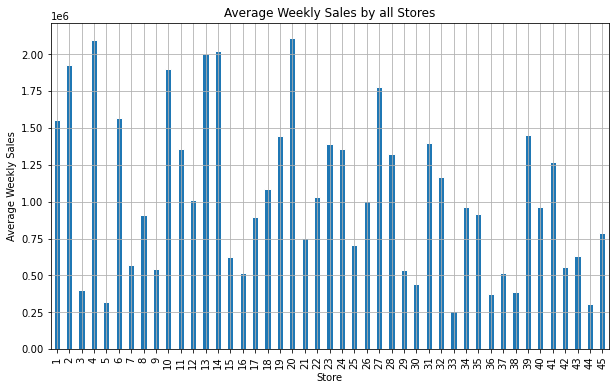

In [20]:
average_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean()

# Bar plot of stores vs. average weekly sales
plt.figure(figsize=(10, 6))
average_sales_by_store.plot(kind='bar', edgecolor='w')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by all Stores')
plt.grid(True)
plt.show()

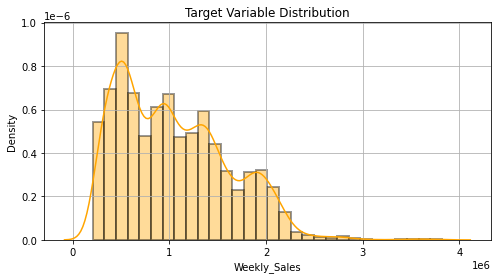

In [19]:
plt.figure(figsize=[8,4])
sns.distplot(df['Weekly_Sales'], color='orange',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.grid(True)
plt.show()

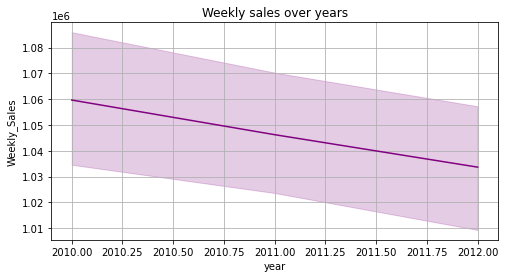

In [21]:
plt.figure(figsize=[8,4])
sns.lineplot(x='year', y='Weekly_Sales',color = 'purple', data=df)

plt.title('Weekly sales over years')
plt.grid(True)
plt.show()

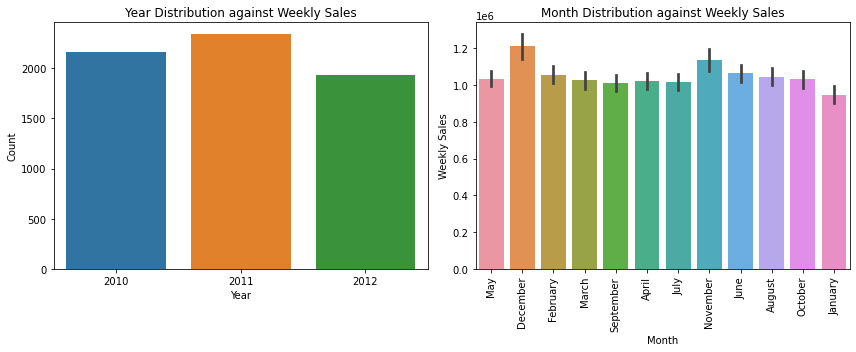

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Year Distribution as a countplot against Weekly Sales
sns.countplot(x='year', data=df, ax=axes[0])
axes[0].set_title('Year Distribution against Weekly Sales')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

# Month Distribution as a barplot against Weekly Sales
sns.barplot(x='month', y='Weekly_Sales', data=df, ax=axes[1])
axes[1].set_title('Month Distribution against Weekly Sales')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Weekly Sales')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### When we look at the graph above, the best sales are in December and November, as expected. The highest values belong to Thanksgiving holiday but when we take average it is obvious that December has the best value.

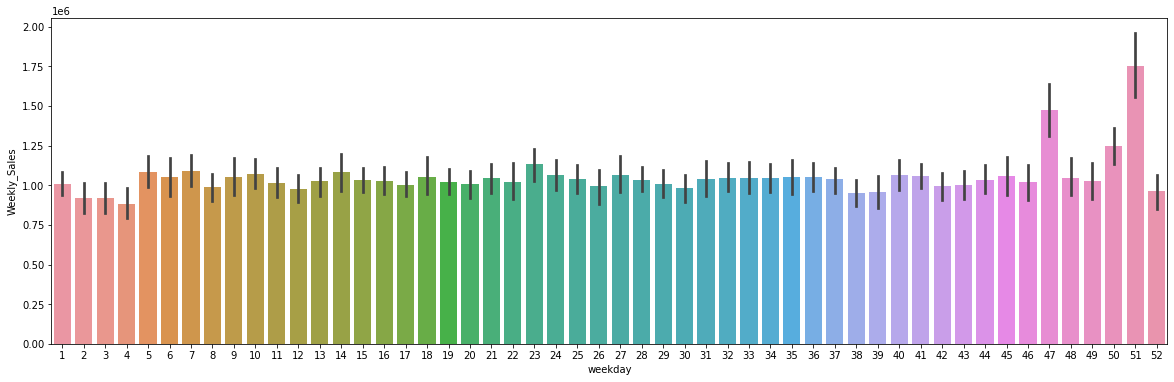

In [19]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='weekday', y='Weekly_Sales', data=df)

#### From the graph, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thanksgiving and Black Friday effects.

<Figure size 720x432 with 0 Axes>

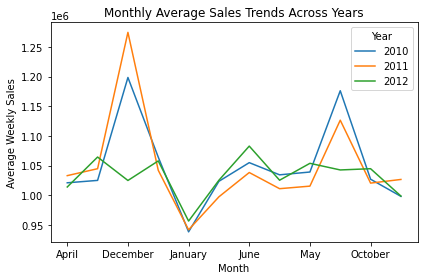

In [31]:
df.groupby('month')['Weekly_Sales'].mean()
df.groupby('year')['Weekly_Sales'].mean()

monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Average Sales Trends Across Years")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

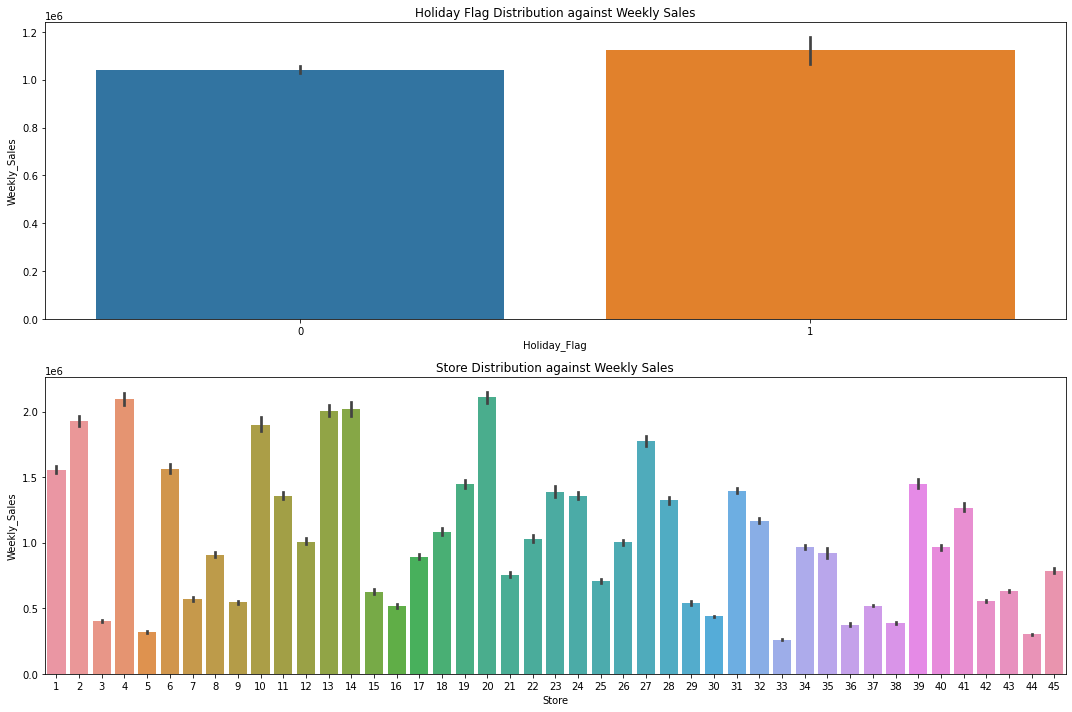

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Bar plot for Holiday Flag Distribution against Weekly Sales
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df, ax=axes[0])
axes[0].set_title('Holiday Flag Distribution against Weekly Sales')

# Bar plot for Store Distribution against Weekly Sales
sns.barplot(x='Store', y='Weekly_Sales', data=df, ax=axes[1])
axes[1].set_title('Store Distribution against Weekly Sales')

plt.tight_layout()
plt.show()

#### The bar plots reveal how weekly sales are influenced by holiday periods and how sales are distributed among different stores, providing insights into the impact of holidays and store-specific dynamics on sales patterns.

Text(0.5, 1.0, 'Unemployment Distribution')

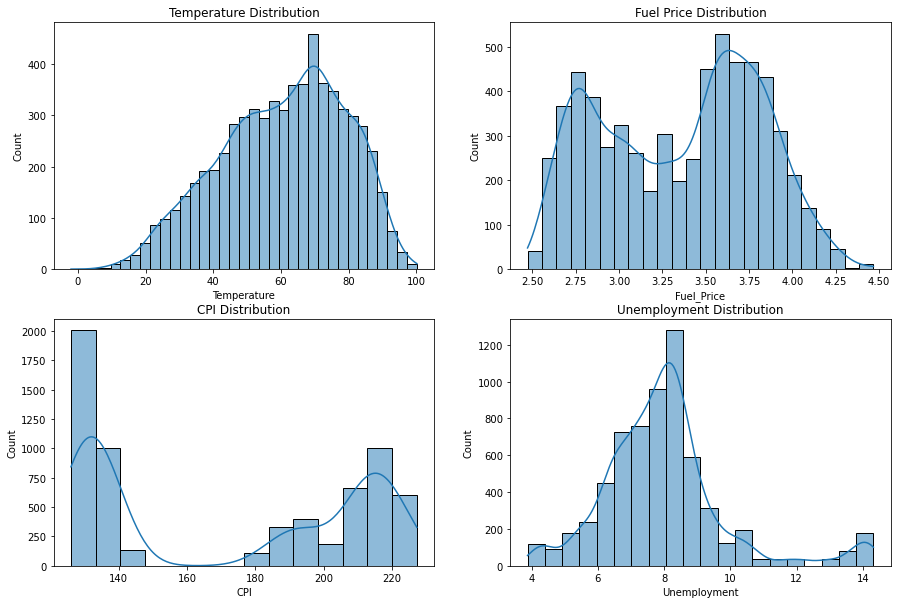

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Temperature'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')

sns.histplot(df['Fuel_Price'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Fuel Price Distribution')

sns.histplot(df['CPI'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('CPI Distribution')

sns.histplot(df['Unemployment'], kde=True, bins = 20, ax=axes[1, 1])
axes[1, 1].set_title('Unemployment Distribution')

#### These plots show how temperature, fuel prices, CPI, and unemployment are distributed

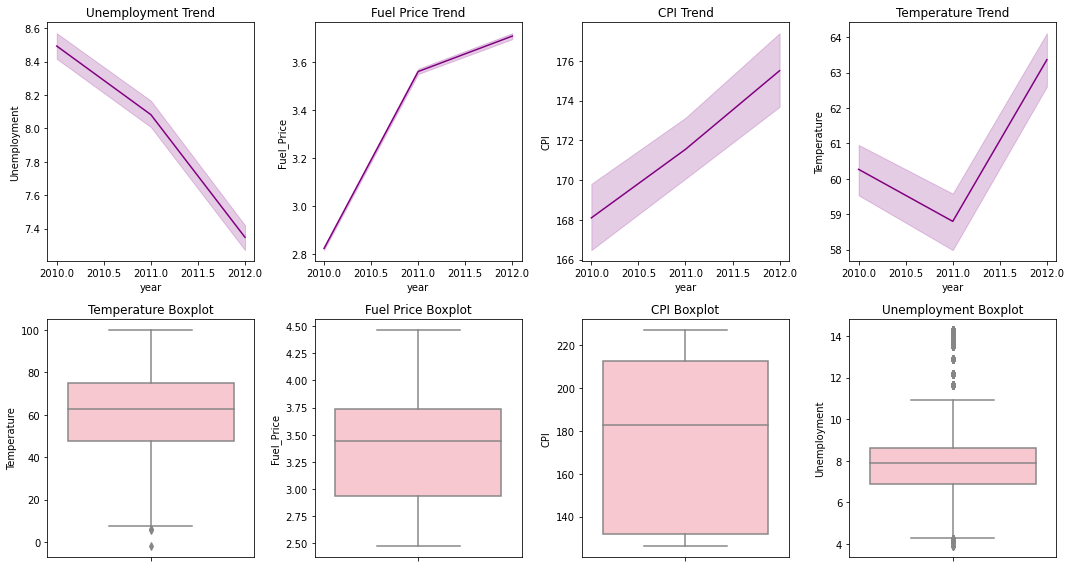

In [55]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

sns.lineplot(x='year', y='Unemployment',color = 'purple', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Unemployment Trend')

sns.lineplot(x='year', y='Fuel_Price',color = 'purple', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Fuel Price Trend')

sns.lineplot(x='year', y='CPI',color = 'purple', data=df, ax=axes[0, 2])
axes[0, 2].set_title('CPI Trend')

sns.lineplot(x='year', y='Temperature',color = 'purple', data=df, ax=axes[0, 3])
axes[0, 3].set_title('Temperature Trend')

sns.boxplot(y='Temperature',color = 'pink', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Temperature Boxplot')

sns.boxplot(y='Fuel_Price',color = 'pink', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Fuel Price Boxplot')

sns.boxplot(y='CPI',color = 'pink', data=df, ax=axes[1, 2])
axes[1, 2].set_title('CPI Boxplot')

sns.boxplot(y='Unemployment',color = 'pink', data=df, ax=axes[1, 3])
axes[1, 3].set_title('Unemployment Boxplot')

plt.tight_layout()

#### The boxplots provide a comprehensive view of the distribution and potential outliers of temperature, fuel prices, CPI, and unemployment

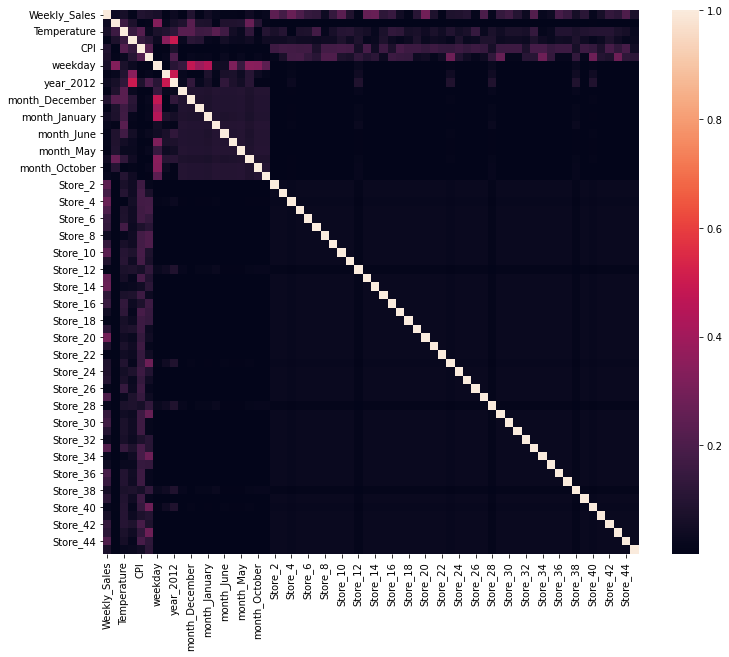

In [58]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr().abs())    # To see the correlations without dropping columns
plt.show()

<a id="3"></a> <br>
## 3] Data Cleansing

#### Duplicates:

In [16]:
duplicates_exist = original_df.duplicated().any()
print("Duplicates exist:", duplicates_exist)

Duplicates exist: False


#### Missing values:

In [17]:
null_values = original_df.isnull().sum().any()
print('null values :',null_values )

null values : False


In [10]:
df1 = df.copy()

for i in cf:
    if df1[i].nunique() == 2: # Ensure only binary categorical features are considered
        print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i)
        df1[i] = pd.get_dummies(df1[i], drop_first=True, prefix=str(i))
        
    elif df1[i].nunique() > 2:
        print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i)
        df_dummy = pd.get_dummies(df1[i], drop_first=True, prefix=str(i))
        df1 = pd.concat([df1.drop([i], axis=1), df_dummy], axis=1)

df1.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year

Dummy Encoding on features:
month

Dummy Encoding on features:
Store


(6435, 65)

In [11]:
#Removal of outlier:

df2 = df1.copy()

features1 = nf

for i in features1:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df2[df1[i] <= (Q3+(1.5*IQR))]
    df2 = df2[df1[i] >= (Q1-(1.5*IQR))]
    df2 = df2.reset_index(drop=True)
display(df1.head())
print('Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df2.shape[0]))

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,0,0,...,0,0,0,0,0,0,0,0,0,0


Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


In [12]:
print('dropped samples:',df1.shape[0] - df2.shape[0])
print('dropped samples in %:',(df1.shape[0] - df2.shape[0])/df1.shape[0] *100)

print('retained samples:',df1.shape[0]-(df1.shape[0]-df2.shape[0]))
print('retained samples in %:',(df1.shape[0]-(df1.shape[0]-df2.shape[0]))/df1.shape[0]*100)

dropped samples: 482
dropped samples in %: 7.490287490287491
retained samples: 5953
retained samples in %: 92.5097125097125


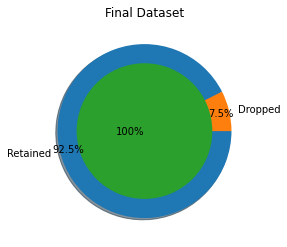


Inference: After the cleanup process, 482 samples were dropped, while retaining 92.51% of the data.


In [13]:
#Final Dataset size after performing Preprocessing
df = df2.copy()

plt.title('Final Dataset')

plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)

plt.pie([df.shape[0]], labels=['100%'], labeldistance= -0, radius=0.78)

plt.show()


print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0] - df.shape[0]} samples were dropped, \
while retaining {round((df.shape[0] * 100 / original_df.shape[0]), 2)}% of the data.')

In [34]:
df.columns

Index(['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'weekday', 'year_2011', 'year_2012',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'Store_2',
       'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
       'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20',
       'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32',
       'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38',
       'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44',
       'Store_45'],
      dtype='object')

<a id="4"></a> <br>
## 4] Data splitting

In [14]:
df[target]

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
5948     713173.95
5949     733455.07
5950     734464.36
5951     718125.53
5952     760281.43
Name: Weekly_Sales, Length: 5953, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5953, 64) (5953,) 
Training set  --->  (4762, 64) (4762,) 
Testing set   --->  (1191, 64)  (1191,)


In [48]:
Test_X

,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,month_August,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
52,2011-04-02,0,42.27,2.989,212.566881,7.742,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2426,2012-05-10,0,59.68,4.027,138.825600,8.243,19,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2232,2011-10-14,0,47.69,3.567,129.770645,6.617,41,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2369,2011-02-09,0,68.23,3.784,136.244097,8.890,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3096,2011-11-25,1,35.23,3.536,136.478800,4.420,47,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,2010-08-13,0,88.37,3.049,126.064000,9.199,32,0,0,1,...,0,0,0,0,0,0,1,0,0,0
617,2011-04-15,0,72.02,3.743,215.859267,6.489,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1745,2010-03-09,0,78.37,2.715,182.604292,8.743,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5075,2011-08-19,0,87.93,3.554,214.423993,8.177,33,1,0,1,...,0,0,0,1,0,0,0,0,0,0


<a id="5"></a> <br>
## 5] Model Building

<a id="6"></a> <br>
### a) Timeseries Forecasting using Random Forest Regressor:

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [18]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 15)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

pipe = make_pipeline(scaler, rf)

Train_X_without_date = Train_X.drop(['Date'], axis=1)
Test_X_without_date = Test_X.drop(['Date'], axis=1)

# Fit the pipeline without the date column
pipe.fit(Train_X_without_date, Train_Y)

y_pred = pipe.predict(Train_X_without_date)

# Predict using the pipeline
y_pred_test = pipe.predict(Test_X_without_date)


In [29]:
def wmae_test(test, pred): # WMAE for test 
    weights = Test_X['Holiday_Flag'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [30]:
wmae_test(Test_Y, y_pred_test)

115034.38856661462

In [31]:
y_pred_test

array([1277977.66497732, 1059929.68363458,  889785.50341576, ...,
       2085015.36273691, 1439900.6748345 ,  637225.97481831])

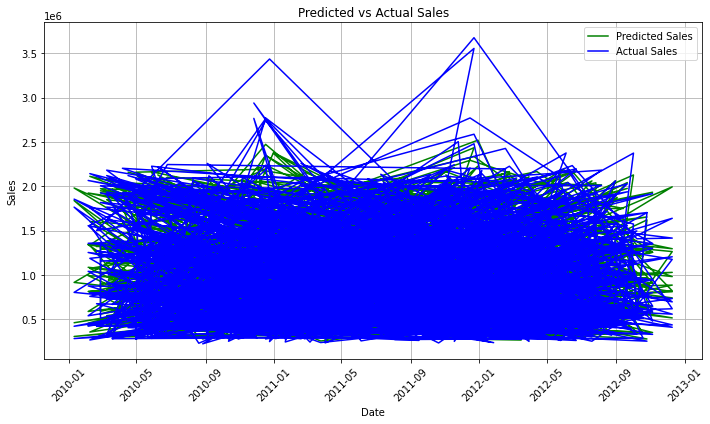

In [50]:
import matplotlib.pyplot as plt

predictions = y_pred_test  
actual_sales = Test_Y 

# Create a DataFrame for visualization
results_df = pd.DataFrame({'Date': Test_X['Date'], 'Predicted_Sales': predictions, 'Actual_Sales': actual_sales})

plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['Predicted_Sales'], label='Predicted Sales', color='g')
plt.plot(results_df['Date'], results_df['Actual_Sales'], label='Actual Sales', color='b')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted vs Actual Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### MAE in percentage using sklearn's function

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mape_sklearn = mean_absolute_percentage_error(Test_Y, y_pred_test)

print("MAPE using sklearn:", mape_sklearn * 100)

MAPE using sklearn: 9.412016462775556


In [30]:
mae = mean_absolute_error(Test_Y, y_pred_test)
mse = mean_squared_error(Test_Y, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(Test_Y, y_pred_test)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 89700.02
Mean Squared Error: 22215346641.05
Root Mean Squared Error: 149048.14
R-squared: 0.94


<a id="7"></a> <br>
### b) Timeseries Forecasting using ARIMAX

In [16]:
new_df = df2[['Date', 'Weekly_Sales']]
new_df.set_index('Date', inplace=True) 
new_df

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,713173.95
2012-05-10,733455.07
2012-12-10,734464.36


<Figure size 864x864 with 0 Axes>

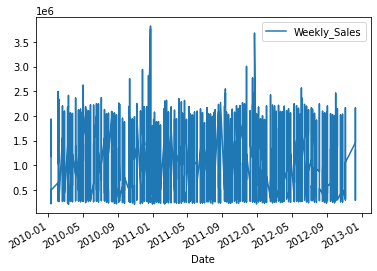

In [17]:
plt.figure(figsize=(12, 12))
new_df.plot()
plt.show()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(new_df['Weekly_Sales'])

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adfuller_test(new_df['Weekly_Sales'])

ADF Test Statistic : -4.6794381344391835
p-value : 9.196454987020436e-05
#Lags Used : 34
Number of Observations Used : 5918
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


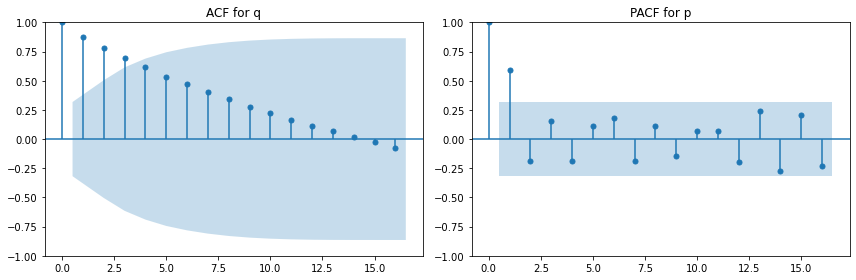

In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_values = acf(new_df['Weekly_Sales'])
pacf_values = pacf(new_df['Weekly_Sales'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(acf_values, ax=ax1)
ax1.set_title('ACF for q')
plot_pacf(pacf_values, ax=ax2)
ax2.set_title('PACF for p')

plt.tight_layout()
plt.show()

In [22]:
train=new_df.iloc[:4792]['Weekly_Sales']
test=new_df.iloc[4792:]['Weekly_Sales']

#### splitting it into 80 : 20 ratio

In [23]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(1,0,10))
model_fit=model.fit()

C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zerin\anaconda3\lib\site-

In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                 4792
Model:                ARIMA(1, 0, 10)   Log Likelihood              -64586.570
Date:                Tue, 22 Aug 2023   AIC                         129199.141
Time:                        12:47:46   BIC                         129283.312
Sample:                             0   HQIC                        129228.705
                               - 4792                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.117e+06   2.05e-10   5.45e+15      0.000    1.12e+06    1.12e+06
ar.L1          0.9920      0.002    487.542      0.000       0.988       0.996
ma.L1         -0.3717      0.007    -49.593      0.000      -0.386      -0.357
ma.L2         -0.0594      0.011     -5.448      0.000      -0.081      -0.038
ma.L3         -0.1335      0.010    -12.975      0.000      -0.154      -0.113
ma.L4          0.2447      0.009     27.491      0.000       0.227       0.262
ma.L5         -0.3220      0.009    -36.099      0.000      -0.340      -0.305
ma.L6          0.0093      0.013      0.731      0.465      -0.016       0.034
ma.L7          0.0209      0.017      1.245      0.213      -0.012       0.054
ma.L8          0.0486      0.015      3.227      0.001       0.019       0.078
ma.L9         -0.0381      0.017     -2.243      0.025      -0.071      -0.005
ma.L10         0.0175      0.021      0.843      0.399      -0.023       0.058
sigma2      3.014e+10   1.69e-13   1.78e+23      0.000    3.01e+10    3.01e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             66351.11
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.13e+38. Standard errors may be unstable.
"""

C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

<Figure size 864x864 with 0 Axes>

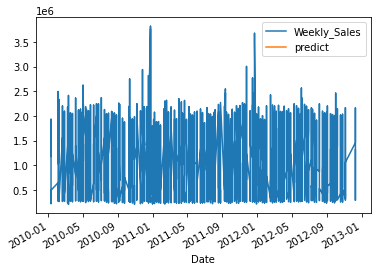

In [24]:
new_df[ 'predict' ]=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dymamics = True)

plt.figure(figsize=(12, 12))
new_df[['Weekly_Sales', 'predict']].plot()


<a id="8"></a> <br>
### c) Timeseries Forecasting using SARIMAX

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order=(1, 0, 10), seasonal_order=(1, 0, 10, 52))
results = model.fit()

forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)

# Extracting predicted values
predicted_sales = forecast.predicted_mean

print(predicted_sales)


C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zerin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
new_df[ 'predict' ]=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dymamics = True)
new_df[['Weekly_Sales', 'predict']].plot()

<a id="9"></a> <br>
### d) Timeseries Forecasting using FBProphet

In [10]:
!pip install prophet

  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached holidays-0.29-py3-none-any.whl (695 kB)


In [27]:
from prophet import Prophet

In [28]:
new_df = df2[['Date', 'Weekly_Sales']]
new_df.set_index('Date', inplace=True) 
new_df

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,713173.95
2012-05-10,733455.07
2012-12-10,734464.36


In [29]:
sales=new_df.groupby('Date')[['Weekly_Sales']].sum()
sales

,Weekly_Sales
Date,
2010-01-10,39825602.62
2010-02-04,47601520.01
2010-02-07,46204385.56
2010-02-19,45363033.79
2010-02-26,41043557.90
...,...
2012-10-08,42765865.16
2012-10-19,40743817.45
2012-10-26,41125802.72


In [30]:
sales['date'] = sales.index

In [31]:
sales

,Weekly_Sales,date
Date,,
2010-01-10,39825602.62,2010-01-10
2010-02-04,47601520.01,2010-02-04
2010-02-07,46204385.56,2010-02-07
2010-02-19,45363033.79,2010-02-19
2010-02-26,41043557.90,2010-02-26
...,...,...
2012-10-08,42765865.16,2012-10-08
2012-10-19,40743817.45,2012-10-19
2012-10-26,41125802.72,2012-10-26


In [32]:
sales = sales.rename(columns = { 'date':'ds' , 'Weekly_Sales':'y'})
sales

,y,ds
Date,,
2010-01-10,39825602.62,2010-01-10
2010-02-04,47601520.01,2010-02-04
2010-02-07,46204385.56,2010-02-07
2010-02-19,45363033.79,2010-02-19
2010-02-26,41043557.90,2010-02-26
...,...,...
2012-10-08,42765865.16,2012-10-08
2012-10-19,40743817.45,2012-10-19
2012-10-26,41125802.72,2012-10-26


In [33]:
sales_model = Prophet(seasonality_mode='additive',interval_width=0.95)
sales_model.fit(sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [34]:
future_periods = 12  # Number of weeks i want to forecast
freq = 'W'  # Weekly frequency

sales_forecast = sales_model.make_future_dataframe(periods=future_periods, freq=freq)

# Generate predictions for the next 12 weeks
sales_forecast = sales_model.predict(sales_forecast)

In [35]:
sales_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-10,4.520440e+07,3.327616e+07,4.845786e+07,4.520440e+07,4.520440e+07,-4.390423e+06,-4.390423e+06,-4.390423e+06,1.765627e+06,1.765627e+06,1.765627e+06,-6.156050e+06,-6.156050e+06,-6.156050e+06,0.0,0.0,0.0,4.081397e+07
1,2010-02-04,4.516041e+07,3.807934e+07,5.299986e+07,4.516041e+07,4.516041e+07,6.133097e+05,6.133097e+05,6.133097e+05,-2.247760e+05,-2.247760e+05,-2.247760e+05,8.380857e+05,8.380857e+05,8.380857e+05,0.0,0.0,0.0,4.577372e+07
2,2010-02-07,4.515513e+07,4.080129e+07,5.603672e+07,4.515513e+07,4.515513e+07,3.350381e+06,3.350381e+06,3.350381e+06,1.765627e+06,1.765627e+06,1.765627e+06,1.584754e+06,1.584754e+06,1.584754e+06,0.0,0.0,0.0,4.850551e+07
3,2010-02-19,4.513402e+07,3.692694e+07,5.159395e+07,4.513402e+07,4.513402e+07,-1.140543e+06,-1.140543e+06,-1.140543e+06,-3.300802e+05,-3.300802e+05,-3.300802e+05,-8.104626e+05,-8.104626e+05,-8.104626e+05,0.0,0.0,0.0,4.399347e+07
4,2010-02-26,4.512170e+07,3.528166e+07,5.037856e+07,4.512170e+07,4.512170e+07,-2.200227e+06,-2.200227e+06,-2.200227e+06,-3.300802e+05,-3.300802e+05,-3.300802e+05,-1.870146e+06,-1.870146e+06,-1.870146e+06,0.0,0.0,0.0,4.292147e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2013-02-03,4.196121e+07,3.658903e+07,5.154361e+07,4.194768e+07,4.197349e+07,2.289384e+06,2.289384e+06,2.289384e+06,1.765627e+06,1.765627e+06,1.765627e+06,5.237568e+05,5.237568e+05,5.237568e+05,0.0,0.0,0.0,4.425059e+07
151,2013-02-10,4.192887e+07,3.764716e+07,5.253633e+07,4.191282e+07,4.194328e+07,3.303064e+06,3.303064e+06,3.303064e+06,1.765627e+06,1.765627e+06,1.765627e+06,1.537437e+06,1.537437e+06,1.537437e+06,0.0,0.0,0.0,4.523193e+07
152,2013-02-17,4.189653e+07,3.513166e+07,5.123120e+07,4.187710e+07,4.191329e+07,1.466251e+06,1.466251e+06,1.466251e+06,1.765627e+06,1.765627e+06,1.765627e+06,-2.993760e+05,-2.993760e+05,-2.993760e+05,0.0,0.0,0.0,4.336278e+07
153,2013-02-24,4.186419e+07,3.433043e+07,4.912409e+07,4.184196e+07,4.188343e+07,-1.857526e+04,-1.857526e+04,-1.857526e+04,1.765627e+06,1.765627e+06,1.765627e+06,-1.784203e+06,-1.784203e+06,-1.784203e+06,0.0,0.0,0.0,4.184562e+07


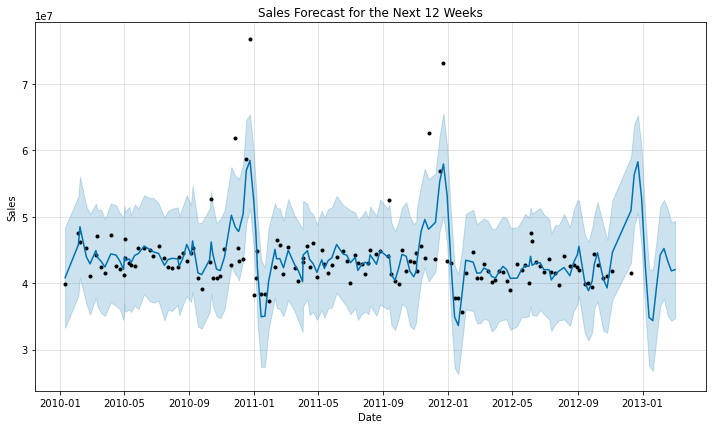

In [36]:
fig = sales_model.plot(sales_forecast)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 12 Weeks')
plt.show()

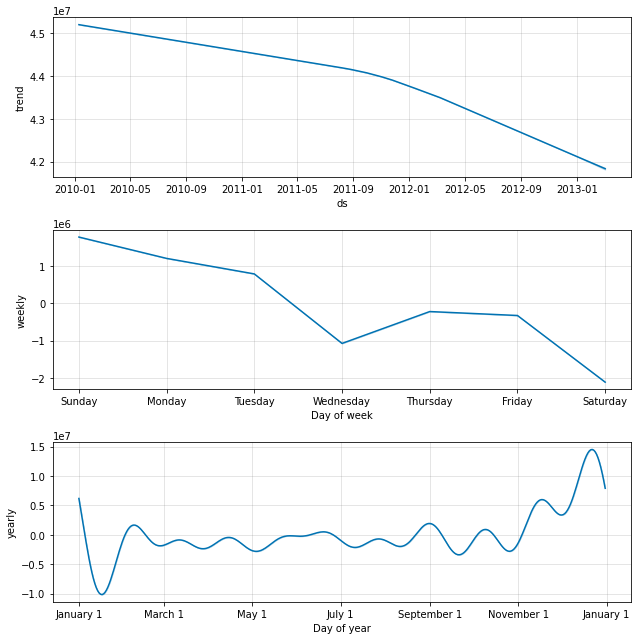

In [37]:
sales_model.plot_components(sales_forecast);

In [38]:
forecasted_values = sales_forecast[['ds', 'yhat']].tail(future_periods)
print(forecasted_values)

            ds          yhat
143 2012-12-16  5.630838e+07
144 2012-12-23  5.828825e+07
145 2012-12-30  5.278327e+07
146 2013-01-06  4.257275e+07
147 2013-01-13  3.484059e+07
148 2013-01-20  3.436295e+07
149 2013-01-27  3.939233e+07
150 2013-02-03  4.425059e+07
151 2013-02-10  4.523193e+07
152 2013-02-17  4.336278e+07
153 2013-02-24  4.184562e+07
154 2013-03-03  4.204337e+07


In [39]:
uncertainty_intervals = sales_forecast[['ds', 'yhat_lower', 'yhat_upper']].tail(future_periods)
print(uncertainty_intervals)


            ds    yhat_lower    yhat_upper
143 2012-12-16  4.862547e+07  6.393777e+07
144 2012-12-23  5.060051e+07  6.530217e+07
145 2012-12-30  4.549265e+07  6.035112e+07
146 2013-01-06  3.553899e+07  5.005358e+07
147 2013-01-13  2.758841e+07  4.214581e+07
148 2013-01-20  2.678130e+07  4.193850e+07
149 2013-01-27  3.176651e+07  4.628676e+07
150 2013-02-03  3.658903e+07  5.154361e+07
151 2013-02-10  3.764716e+07  5.253633e+07
152 2013-02-17  3.513166e+07  5.123120e+07
153 2013-02-24  3.433043e+07  4.912409e+07
154 2013-03-03  3.475052e+07  4.940047e+07


In [42]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(sales_model, initial='204 days', period='42 days', horizon='84 days')

INFO:prophet:Making 19 forecasts with cutoffs between 2010-08-23 00:00:00 and 2012-09-17 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdsta

In [47]:
from prophet. diagnostics import performance_metrics
df_p = performance_metrics (df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,6.913009e+14,2.629260e+07,1.359988e+07,0.323900,0.054999,0.246158,0.636364
1,11 days,1.057453e+15,3.251851e+07,1.718839e+07,0.379794,0.074131,0.301217,0.636364
2,12 days,5.508409e+15,7.421866e+07,3.073017e+07,0.683616,0.066562,0.376749,0.681818
3,13 days,5.504496e+15,7.419229e+07,3.041600e+07,0.678072,0.061365,0.370354,0.727273
4,14 days,5.324650e+15,7.297020e+07,2.797352e+07,0.621113,0.056145,0.334663,0.772727
5,15 days,1.024496e+16,1.012174e+08,4.049687e+07,0.894496,0.051843,0.384164,0.772727
6,16 days,1.024516e+16,1.012184e+08,4.054483e+07,0.895466,0.055321,0.385874,0.772727
7,17 days,1.084849e+16,1.041561e+08,4.425866e+07,0.978666,0.049670,0.401350,0.756494
8,18 days,1.205833e+16,1.098104e+08,4.832547e+07,1.133279,0.050038,0.379355,0.772727
9,21 days,1.205904e+16,1.098137e+08,4.840721e+07,1.135188,0.053854,0.380989,0.772727


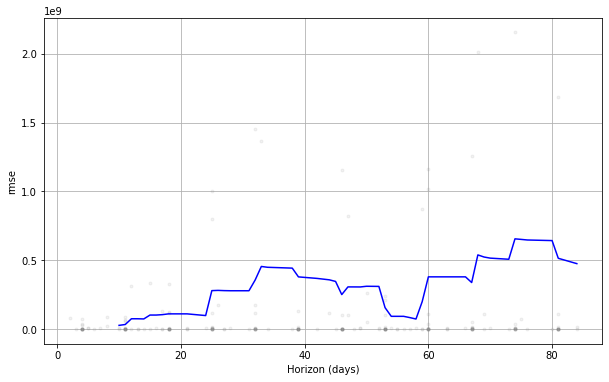

In [46]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric (df_cv, metric= 'rmse')

<a id="10"></a> <br>
## 6] Final Analysis:

### Rejection Reasons:
#### ARIMA and SARIMA: 
These models seem to have faced difficulties in capturing the complexity of your data, possibly due to non-stationarity or irregular seasonality.
#### Random Forest Regressor: 
Despite good metrics, it lacks the time-specific modeling capabilities required for your sales data.

### Recommendation: Facebook Prophet model

- Considering our need for accurate predictions and the ability to visualize trends, the Facebook Prophet model seems to be a suitable choice. 
- Robust cross-validation and performance metrics support model's reliability.
- Model effectively handles seasonality, incorporates holiday effects, and provides actionable forecasts.
- FB Prophet's compatibility with project requirements, ease of use, interpretability, and the integration of Cross-Validation were key factors that guided my decision.
